In [1]:
import numpy as np 
import pandas as pd

import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

import helpers
import data_processing as dp

['d:\\Repositories\\PhD\\notebooks\\CSECS_2025', 'd:\\HackoAcademic_Anaconda\\python312.zip', 'd:\\HackoAcademic_Anaconda\\DLLs', 'd:\\HackoAcademic_Anaconda\\Lib', 'd:\\HackoAcademic_Anaconda', '', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\win32', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\win32\\lib', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\Pythonwin', 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\setuptools\\_vendor', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [18]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.metrics import roc_curve

# Benchmark Model

In [2]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")

In [7]:
correct_df = df.iloc[:390054, :]

In [10]:
Xc1 = correct_df[['Channel 1']]
Xc2 = correct_df[['Channel 2']]
Xc3 = correct_df[['Channel 3']]
y = correct_df['FAULT']

In [11]:
Xc1_train, Xc1_test, yc1_train, yc1_test = helpers.split_data(Xc1, y, test_size = 0.25, random_state = 42, shuffle = True)
Xc2_train, Xc2_test, yc2_train, yc2_test = helpers.split_data(Xc2, y, test_size = 0.25, random_state = 42, shuffle = True)
Xc3_train, Xc3_test, yc3_train, yc3_test = helpers.split_data(Xc3, y, test_size = 0.25, random_state = 42, shuffle = True)

In [ ]:
y_train_pred_c1, y_test_pred_c1, xgbc_c1 = helpers.train_and_predict_xgbc(Xc1_train, yc1_train, Xc1_test)
y_train_pred_c3, y_test_pred_c2, xgbc_c2 = helpers.train_and_predict_xgbc(Xc2_train, yc2_train, Xc2_test)
y_train_pred_c3, y_test_pred_c3, xgbc_c3 = helpers.train_and_predict_xgbc(Xc3_train, yc3_train, Xc3_test)

In [14]:
fpr_train_c1, tpr_train_c1, _ = roc_curve(yc1_train, y_train_pred_c1)
fpr_test_c1, tpr_test_c1, thr_c1 = roc_curve(yc1_test, y_test_pred_c1)
# Channel 2
fpr_train_c2, tpr_train_c2, _ = roc_curve(yc2_train, y_train_pred_c2)
fpr_test_c2, tpr_test_c2, thr_c2 = roc_curve(yc2_test, y_test_pred_c2)
# Channel 3
fpr_train_c3, tpr_train_c3, _ = roc_curve(yc3_train, y_train_pred_c3)
fpr_test_c3, tpr_test_c3, thr_c3 = roc_curve(yc3_test, y_test_pred_c3)

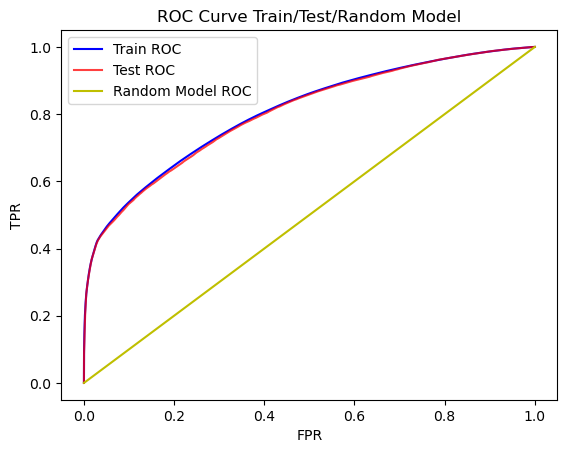

In [15]:
helpers.plot_roc((fpr_train_c1, tpr_train_c1), (fpr_test_c1, tpr_test_c1), roc_bm = None)

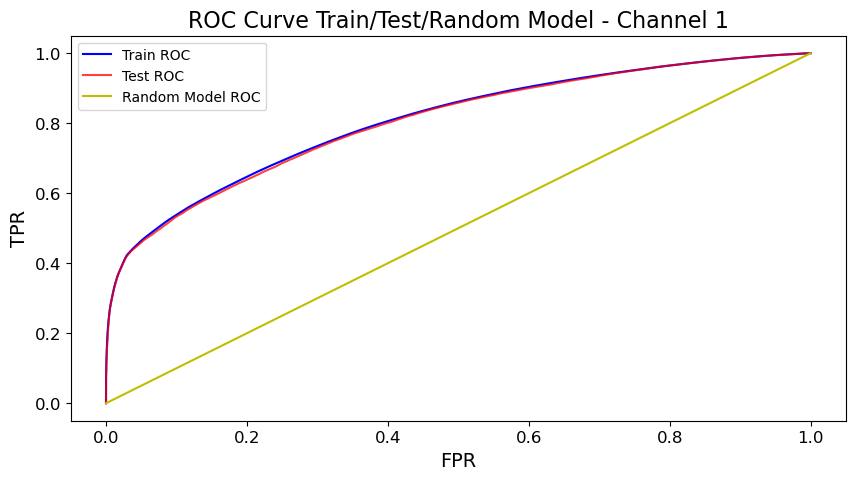

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c1, tpr_train_c1, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c1, tpr_test_c1, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_train_c1, fpr_train_c1, color = 'y', label = 'Random Model ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Random Model - Channel 1", fontdict= {'fontsize' : 16})
plt.legend()

In [20]:
best_thr_c1 = helpers.get_best_thr(tpr_test_c1, fpr_test_c1, thr_c1)
helpers.print_scores(yc1_test, np.where(y_test_pred_c1 >= best_thr_c1, 1, 0))

F1: 0.681
Accuracy: 0.710
Precision: 0.828
ROC AUC: 0.720
Recall: 0.579


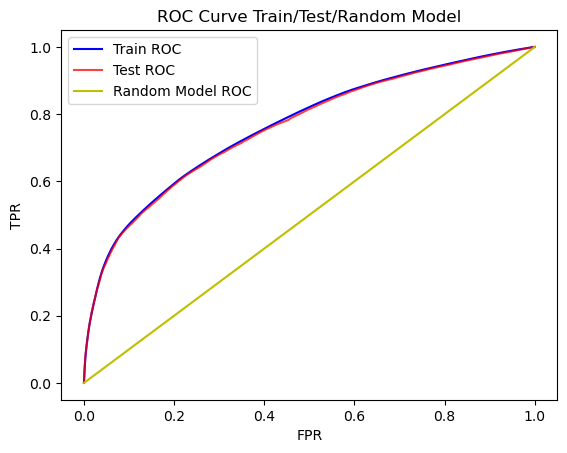

In [16]:
helpers.plot_roc((fpr_train_c2, tpr_train_c2), (fpr_test_c2, tpr_test_c2), roc_bm = None)

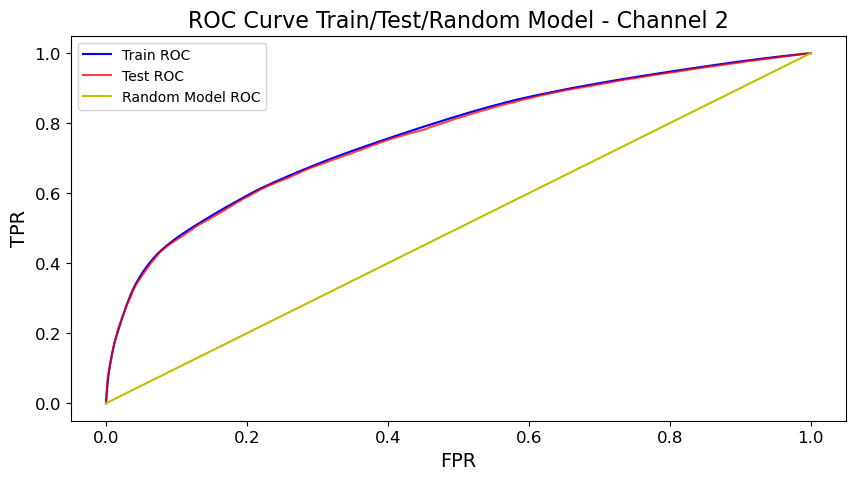

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c2, tpr_train_c2, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c2, tpr_test_c2, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_train_c2, fpr_train_c2, color = 'y', label = 'Random Model ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Random Model - Channel 2", fontdict= {'fontsize' : 16})
plt.legend()

In [22]:
best_thr_c2 = helpers.get_best_thr(tpr_test_c2, fpr_test_c2, thr_c2)
helpers.print_scores(yc2_test, np.where(y_test_pred_c2 >= best_thr_c2, 1, 0))

F1: 0.678
Accuracy: 0.690
Precision: 0.763
ROC AUC: 0.696
Recall: 0.611


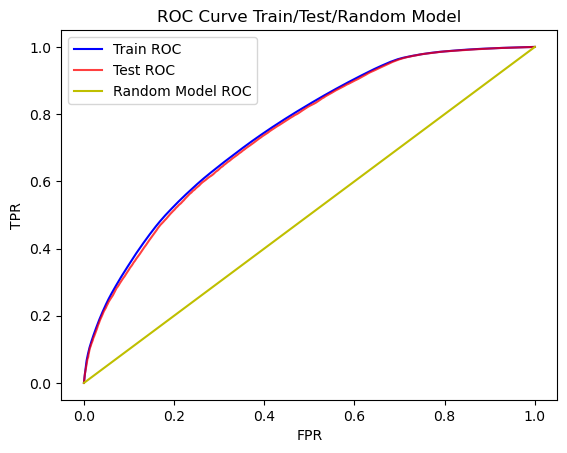

In [17]:
helpers.plot_roc((fpr_train_c3, tpr_train_c3), (fpr_test_c3, tpr_test_c3), roc_bm = None)

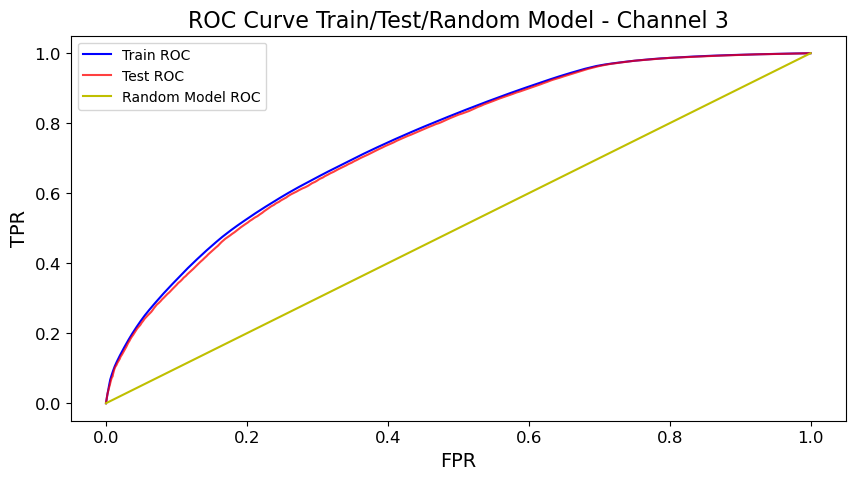

In [23]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c3, tpr_train_c3, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c3, tpr_test_c3, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_train_c3, fpr_train_c3, color = 'y', label = 'Random Model ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Random Model - Channel 3", fontdict= {'fontsize' : 16})
plt.legend()

In [24]:
best_thr_c3 = helpers.get_best_thr(tpr_test_c3, fpr_test_c3, thr_c3)
helpers.print_scores(yc3_test, np.where(y_test_pred_c3 >= best_thr_c3, 1, 0))

F1: 0.695
Accuracy: 0.672
Precision: 0.691
ROC AUC: 0.670
Recall: 0.699


# Extracted Knowledge only Models

## Channel 1

In [25]:
extracted_features_c1 = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\extracted_features_Channel_1.csv")

In [27]:
Xc1_fe = extracted_features_c1
Xc1_fe_train, Xc1_fe_test, yc1_fe_train, yc1_fe_test = helpers.split_data(Xc1_fe, y[:-1], test_size = 0.25, random_state = 42, shuffle = True)

In [28]:
y_train_pred_c1_fe, y_test_pred_c1_fe, xgbc_c1_fe = helpers.train_and_predict_xgbc(Xc1_fe_train, yc1_fe_train, Xc1_fe_test)
fpr_train_c1_fe, tpr_train_c1_fe, _ = roc_curve(yc1_fe_train, y_train_pred_c1_fe)
fpr_test_c1_fe, tpr_test_c1_fe, thr_c1_fe = roc_curve(yc1_fe_test, y_test_pred_c1_fe)

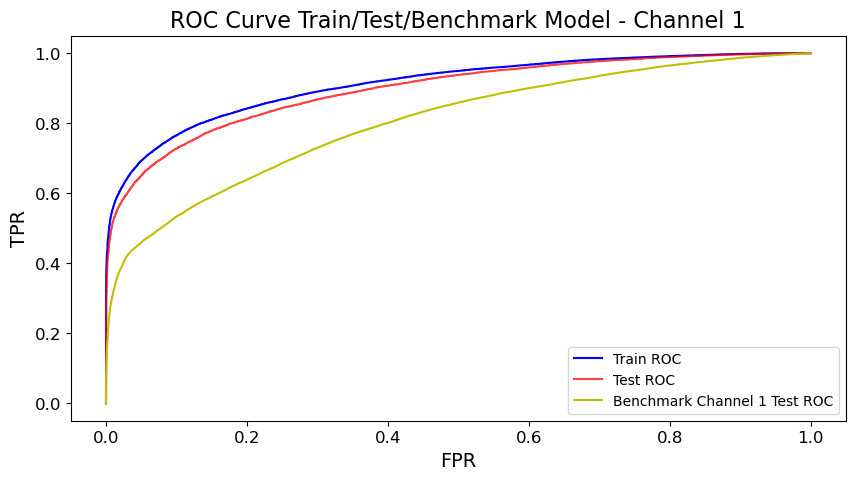

In [30]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c1_fe, tpr_train_c1_fe, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c1_fe, tpr_test_c1_fe, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_test_c1, tpr_test_c1, color = 'y', label = 'Benchmark Channel 1 Test ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Benchmark Model - Channel 1", fontdict= {'fontsize' : 16})
plt.legend()

In [31]:
best_thr_c1_fe = helpers.get_best_thr(tpr_test_c1_fe, fpr_test_c1_fe, thr_c1_fe)
helpers.print_scores(yc1_fe_test, np.where(y_test_pred_c1_fe >= best_thr_c1_fe, 1, 0))

F1: 0.815
Accuracy: 0.812
Precision: 0.863
ROC AUC: 0.815
Recall: 0.772


## Channel 2


In [32]:
extracted_features_c2 = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\extracted_features_Channel_2.csv")
Xc2_fe = extracted_features_c2
Xc2_fe_train, Xc2_fe_test, yc2_fe_train, yc2_fe_test = helpers.split_data(Xc2_fe, y[:-1], test_size = 0.25, random_state = 42, shuffle = True)

y_train_pred_c2_fe, y_test_pred_c2_fe, xgbc_c2_fe = helpers.train_and_predict_xgbc(Xc2_fe_train, yc2_fe_train, Xc2_fe_test)
fpr_train_c2_fe, tpr_train_c2_fe, _ = roc_curve(yc2_fe_train, y_train_pred_c2_fe)
fpr_test_c2_fe, tpr_test_c2_fe, thr_c2_fe = roc_curve(yc2_fe_test, y_test_pred_c2_fe)

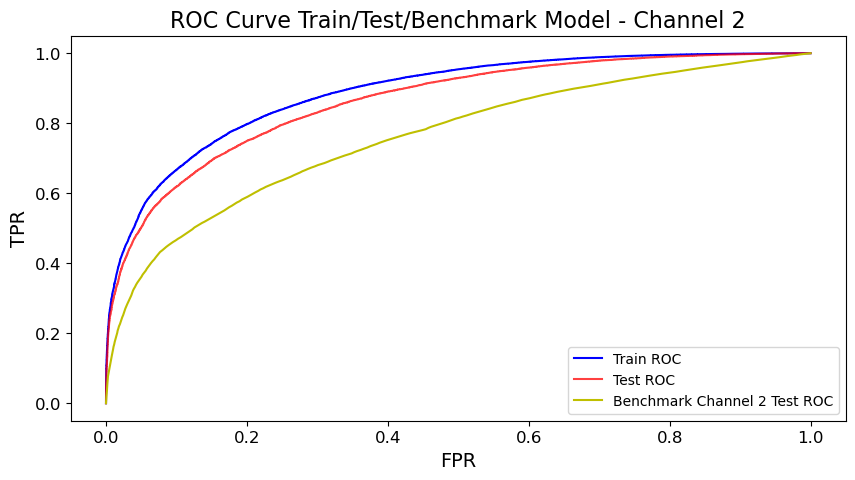

In [33]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c2_fe, tpr_train_c2_fe, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c2_fe, tpr_test_c2_fe, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_test_c2, tpr_test_c2, color = 'y', label = 'Benchmark Channel 2 Test ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Benchmark Model - Channel 2", fontdict= {'fontsize' : 16})
plt.legend()

In [34]:
best_thr_c2_fe = helpers.get_best_thr(tpr_test_c2_fe, fpr_test_c2_fe, thr_c2_fe)
helpers.print_scores(yc2_fe_test, np.where(y_test_pred_c2_fe >= best_thr_c2_fe, 1, 0))

F1: 0.780
Accuracy: 0.773
Precision: 0.812
ROC AUC: 0.775
Recall: 0.749


## Channel 3

In [36]:
extracted_features_c3 = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\extracted_features_Channel_3.csv")
Xc3_fe = extracted_features_c3
Xc3_fe_train, Xc3_fe_test, yc3_fe_train, yc3_fe_test = helpers.split_data(Xc3_fe, y[:-1], test_size = 0.25, random_state = 42, shuffle = True)

y_train_pred_c3_fe, y_test_pred_c3_fe, xgbc_c3_fe = helpers.train_and_predict_xgbc(Xc3_fe_train, yc3_fe_train, Xc3_fe_test)
fpr_train_c3_fe, tpr_train_c3_fe, _ = roc_curve(yc3_fe_train, y_train_pred_c3_fe)
fpr_test_c3_fe, tpr_test_c3_fe, thr_c3_fe = roc_curve(yc3_fe_test, y_test_pred_c3_fe)

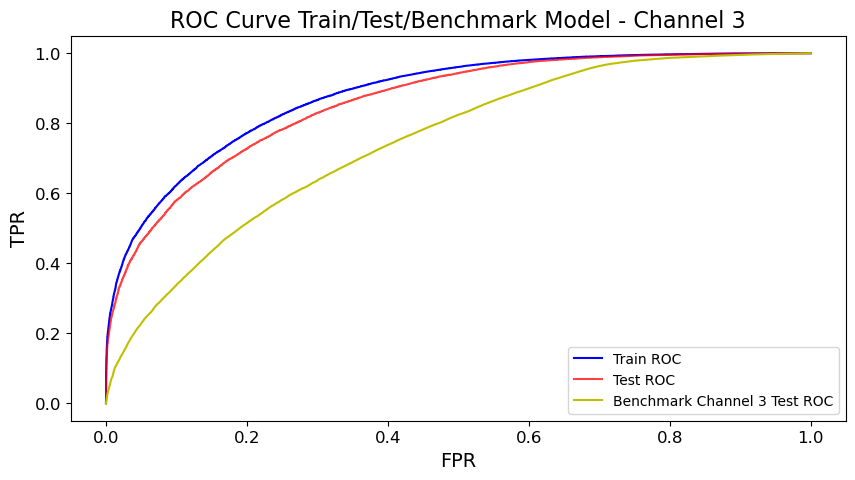

In [37]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c3_fe, tpr_train_c3_fe, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c3_fe, tpr_test_c3_fe, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_test_c3, tpr_test_c3, color = 'y', label = 'Benchmark Channel 3 Test ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Benchmark Model - Channel 3", fontdict= {'fontsize' : 16})
plt.legend()

In [38]:
best_thr_c3_fe = helpers.get_best_thr(tpr_test_c3_fe, fpr_test_c3_fe, thr_c3_fe)
helpers.print_scores(yc3_fe_test, np.where(y_test_pred_c3_fe >= best_thr_c3_fe, 1, 0))

F1: 0.781
Accuracy: 0.767
Precision: 0.787
ROC AUC: 0.767
Recall: 0.776


# Extracted knowledge + Kurtosis

## Channel 1

In [39]:
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [44]:
Xc1_fe_kurt = pd.concat((Xc1_fe, df.loc[:390052,'Channel 1 Kurtosis']), axis = 1)

In [45]:
Xc1_fe_kurt_train, Xc1_fe_kurt_test, yc1_fe_kurt_train, yc1_fe_kurt_test = helpers.split_data(Xc1_fe_kurt, y[:-1], test_size = 0.25, random_state = 42, shuffle = True)
Xc1_kurt_train, Xc1_kurt_test, yc1_kurt_train, yc1_kurt_test = helpers.split_data(df.loc[:390052,'Channel 1 Kurtosis'], y[:-1], test_size = 0.25, random_state = 42, shuffle = True)

y_train_pred_c1_fe_kurt, y_test_pred_c1_fe_kurt, xgbc_c1_fe_kurt = helpers.train_and_predict_xgbc(Xc1_fe_kurt_train, yc1_fe_kurt_train, Xc1_fe_kurt_test)
fpr_train_c1_fe_kurt, tpr_train_c1_fe_kurt, _ = roc_curve(yc1_fe_kurt_train, y_train_pred_c1_fe_kurt)
fpr_test_c1_fe_kurt, tpr_test_c1_fe_kurt, thr_c1_fe_kurt = roc_curve(yc1_fe_kurt_test, y_test_pred_c1_fe_kurt)

y_train_pred_c1_kurt, y_test_pred_c1_kurt, xgbc_c1_kurt = helpers.train_and_predict_xgbc(Xc1_kurt_train, yc1_kurt_train, Xc1_kurt_test)
fpr_train_c1_kurt, tpr_train_fe_kurt, _ = roc_curve(yc1_kurt_train, y_train_pred_c1_kurt)
fpr_test_c1_kurt, tpr_test_c1_kurt, thr_c1_kurt = roc_curve(yc1_kurt_test, y_test_pred_c1_kurt)

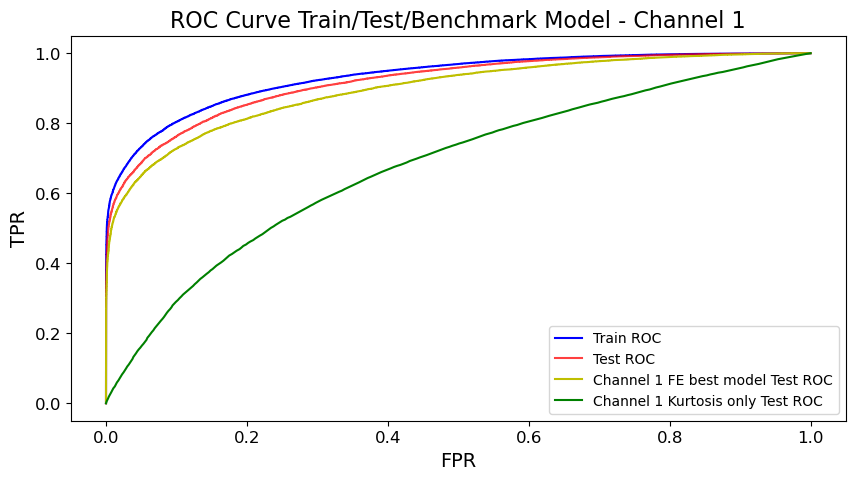

In [49]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c1_fe_kurt, tpr_train_c1_fe_kurt, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c1_fe_kurt, tpr_test_c1_fe_kurt, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_test_c1_fe, tpr_test_c1_fe, color = 'y', label = 'Channel 1 FE best model Test ROC')
plt.plot(fpr_test_c1_kurt, tpr_test_c1_kurt, color = 'g', label = 'Channel 1 Kurtosis only Test ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Benchmark Model - Channel 1", fontdict= {'fontsize' : 16})
plt.legend()

In [53]:
best_thr_c1_fe_kurt = helpers.get_best_thr(tpr_test_c1_fe_kurt, fpr_test_c1_fe_kurt, thr_c1_fe_kurt)
helpers.print_scores(yc1_fe_kurt_test, np.where(y_test_pred_c1_fe_kurt >= best_thr_c1_fe_kurt, 1, 0))

F1: 0.836
Accuracy: 0.831
Precision: 0.871
ROC AUC: 0.833
Recall: 0.805


## Channel 2

In [50]:
Xc2_fe_kurt = pd.concat((Xc2_fe, df.loc[:390052,'Channel 2 Kurtosis']), axis = 1)

In [51]:
Xc2_fe_kurt_train, Xc2_fe_kurt_test, yc2_fe_kurt_train, yc2_fe_kurt_test = helpers.split_data(Xc2_fe_kurt, y[:-1], test_size = 0.25, random_state = 42, shuffle = True)
Xc2_kurt_train, Xc2_kurt_test, yc2_kurt_train, yc2_kurt_test = helpers.split_data(df.loc[:390052,'Channel 2 Kurtosis'], y[:-1], test_size = 0.25, random_state = 42, shuffle = True)

y_train_pred_c2_fe_kurt, y_test_pred_c2_fe_kurt, xgbc_c2_fe_kurt = helpers.train_and_predict_xgbc(Xc2_fe_kurt_train, yc2_fe_kurt_train, Xc2_fe_kurt_test)
fpr_train_c2_fe_kurt, tpr_train_c2_fe_kurt, _ = roc_curve(yc2_fe_kurt_train, y_train_pred_c2_fe_kurt)
fpr_test_c2_fe_kurt, tpr_test_c2_fe_kurt, thr_c2_fe_kurt = roc_curve(yc2_fe_kurt_test, y_test_pred_c2_fe_kurt)

y_train_pred_c2_kurt, y_test_pred_c2_kurt, xgbc_c2_kurt = helpers.train_and_predict_xgbc(Xc2_kurt_train, yc2_kurt_train, Xc2_kurt_test)
fpr_train_c2_kurt, tpr_train_fe_kurt, _ = roc_curve(yc2_kurt_train, y_train_pred_c2_kurt)
fpr_test_c2_kurt, tpr_test_c2_kurt, thr_c2_kurt = roc_curve(yc2_kurt_test, y_test_pred_c2_kurt)

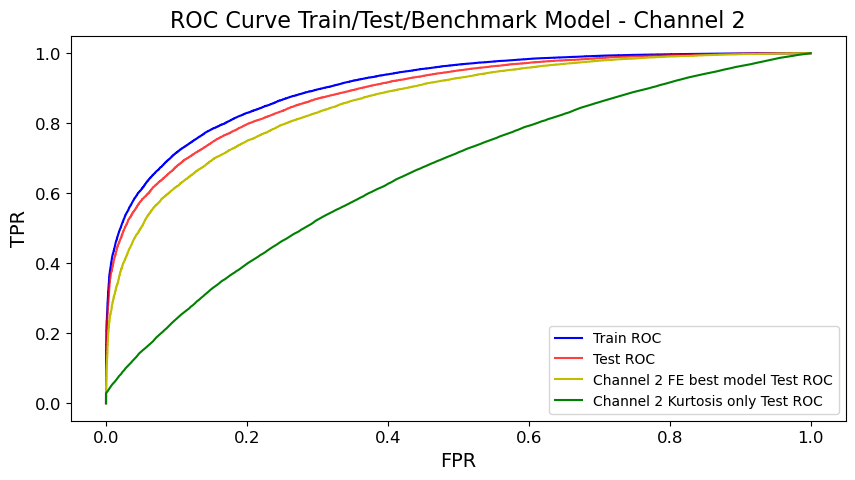

In [52]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c2_fe_kurt, tpr_train_c2_fe_kurt, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c2_fe_kurt, tpr_test_c2_fe_kurt, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_test_c2_fe, tpr_test_c2_fe, color = 'y', label = 'Channel 2 FE best model Test ROC')
plt.plot(fpr_test_c2_kurt, tpr_test_c2_kurt, color = 'g', label = 'Channel 2 Kurtosis only Test ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Benchmark Model - Channel 2", fontdict= {'fontsize' : 16})
plt.legend()

In [54]:
best_thr_c2_fe_kurt = helpers.get_best_thr(tpr_test_c2_fe_kurt, fpr_test_c2_fe_kurt, thr_c2_fe_kurt)
helpers.print_scores(yc2_fe_kurt_test, np.where(y_test_pred_c2_fe_kurt >= best_thr_c2_fe_kurt, 1, 0))

F1: 0.801
Accuracy: 0.797
Precision: 0.840
ROC AUC: 0.799
Recall: 0.766


## Channel 3

In [55]:
Xc3_fe_kurt = pd.concat((Xc2_fe, df.loc[:390052,'Channel 3 Kurtosis']), axis = 1)

In [57]:
Xc3_fe_kurt_train, Xc3_fe_kurt_test, yc3_fe_kurt_train, yc3_fe_kurt_test = helpers.split_data(Xc3_fe_kurt, y[:-1], test_size = 0.25, random_state = 42, shuffle = True)
Xc3_kurt_train, Xc3_kurt_test, yc3_kurt_train, yc3_kurt_test = helpers.split_data(df.loc[:390052,'Channel 3 Kurtosis'], y[:-1], test_size = 0.25, random_state = 42, shuffle = True)

y_train_pred_c3_fe_kurt, y_test_pred_c3_fe_kurt, xgbc_c3_fe_kurt = helpers.train_and_predict_xgbc(Xc3_fe_kurt_train, yc3_fe_kurt_train, Xc3_fe_kurt_test)
fpr_train_c3_fe_kurt, tpr_train_c3_fe_kurt, _ = roc_curve(yc3_fe_kurt_train, y_train_pred_c3_fe_kurt)
fpr_test_c3_fe_kurt, tpr_test_c3_fe_kurt, thr_c3_fe_kurt = roc_curve(yc3_fe_kurt_test, y_test_pred_c3_fe_kurt)

y_train_pred_c3_kurt, y_test_pred_c3_kurt, xgbc_c3_kurt = helpers.train_and_predict_xgbc(Xc3_kurt_train, yc3_kurt_train, Xc3_kurt_test)
fpr_train_c3_kurt, tpr_train_fe_kurt, _ = roc_curve(yc3_kurt_train, y_train_pred_c3_kurt)
fpr_test_c3_kurt, tpr_test_c3_kurt, thr_c3_kurt = roc_curve(yc3_kurt_test, y_test_pred_c3_kurt)

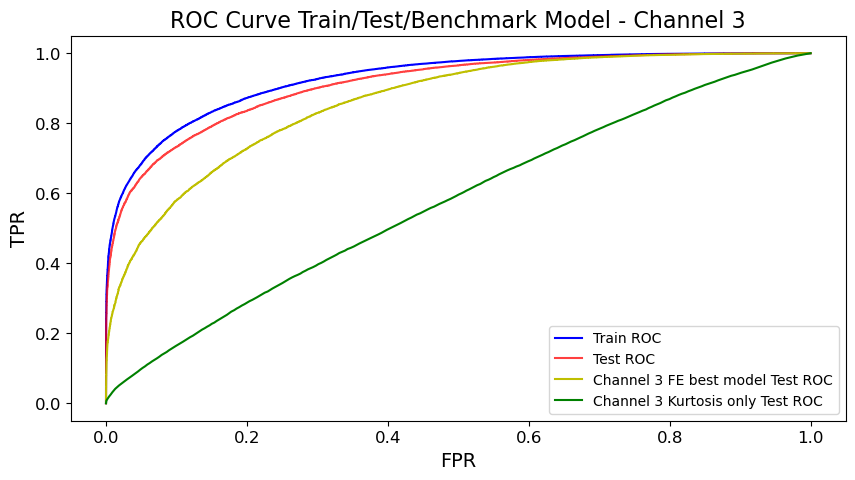

In [59]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_train_c3_fe_kurt, tpr_train_c3_fe_kurt, color = 'b', label = 'Train ROC')
plt.plot(fpr_test_c3_fe_kurt, tpr_test_c3_fe_kurt, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_test_c3_fe, tpr_test_c3_fe, color = 'y', label = 'Channel 3 FE best model Test ROC')
plt.plot(fpr_test_c3_kurt, tpr_test_c3_kurt, color = 'g', label = 'Channel 3 Kurtosis only Test ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Train/Test/Benchmark Model - Channel 3", fontdict= {'fontsize' : 16})
plt.legend()

In [62]:
best_thr_c3_fe_kurt = helpers.get_best_thr(tpr_test_c3_fe_kurt, fpr_test_c3_fe_kurt, thr_c3_fe_kurt)
helpers.print_scores(yc3_fe_kurt_test, np.where(y_test_pred_c3_fe_kurt >= best_thr_c3_fe_kurt, 1, 0))

F1: 0.828
Accuracy: 0.820
Precision: 0.851
ROC AUC: 0.821
Recall: 0.806


# Overall ROC Curve Comparison

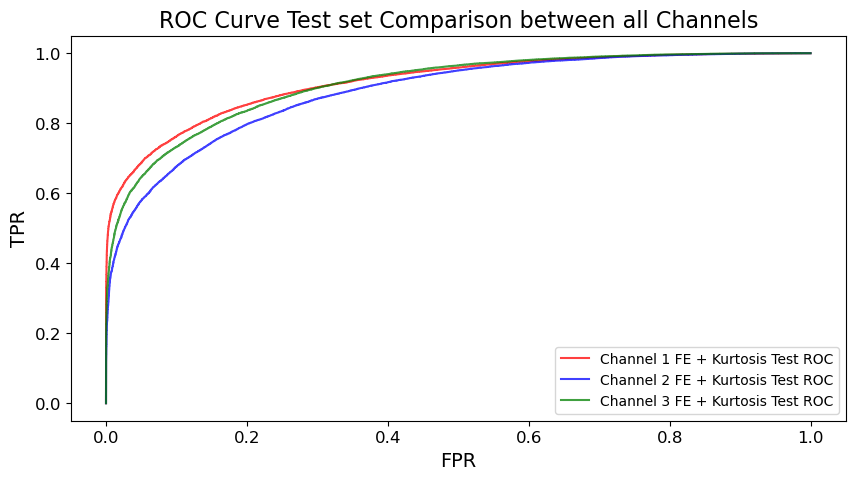

In [61]:
plt.figure(figsize = (10, 5))
plt.plot(fpr_test_c1_fe_kurt, tpr_test_c1_fe_kurt, alpha = 0.75, color = 'r', label = 'Channel 1 FE + Kurtosis Test ROC')
plt.plot(fpr_test_c2_fe_kurt, tpr_test_c2_fe_kurt, alpha = 0.75, color = 'b', label = 'Channel 2 FE + Kurtosis Test ROC')
plt.plot(fpr_test_c3_fe_kurt, tpr_test_c3_fe_kurt, alpha = 0.75, color = 'g', label = 'Channel 3 FE + Kurtosis Test ROC')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('FPR', fontdict= {'fontsize' : 14})
plt.ylabel('TPR', fontdict= {'fontsize' : 14})
plt.title("ROC Curve Test set Comparison between all Channels", fontdict= {'fontsize' : 16})
plt.legend()